<a href="https://colab.research.google.com/github/its-amrita-sarkar-01/Loan-Approval-Prediction/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Data collection and preprocessing

In [2]:
df = pd.read_csv('Loandata.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,Total,Percent
Credit_History,50,8.14
Self_Employed,32,5.21
LoanAmount,22,3.58
Dependents,15,2.44
Loan_Amount_Term,14,2.28
Gender,13,2.12
Married,3,0.49
Loan_Status,0,0.00
Property_Area,0,0.00
CoapplicantIncome,0,0.00


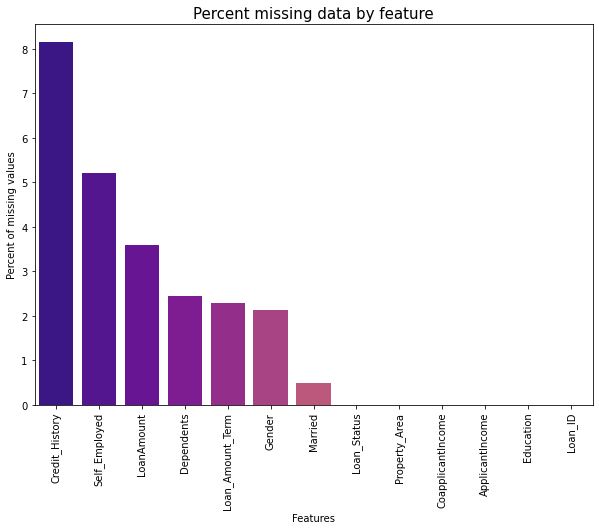

In [5]:
# missing value inspection
Value_Missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2).sort_values(ascending=False)
missing_data = pd.concat([Value_Missing, percent_missing], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize = (10, 7))
plt.xticks(rotation = '90')
sns.barplot(x = missing_data.index, y = missing_data['Percent'], palette='plasma')
plt.xlabel('Features', fontsize = 10)
plt.ylabel('Percent of missing values', fontsize = 10)
plt.title('Percent missing data by feature', fontsize = 15)
missing_data.head(10)

In [6]:
# statistical measures
df.describe([0.8, 0.9, 0.99])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
80%,6252.400000,2535.000000,182.000000,360.00000,1.000000
90%,9459.900000,3782.200000,235.800000,360.00000,1.000000
99%,32540.410000,8895.890000,496.360000,480.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
print(df['Loan_Status'].value_counts(normalize = True), print(df['Loan_Status'].value_counts()))

Y    422
N    192
Name: Loan_Status, dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64 None


In [8]:
# object type variables
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print('\nThe values are:')
        print() 
        print(df[i].value_counts())
        print()

Loan_ID

The values are:

LP002531    1
LP001137    1
LP001531    1
LP001401    1
LP001716    1
           ..
LP002197    1
LP001310    1
LP001379    1
LP002494    1
LP002447    1
Name: Loan_ID, Length: 614, dtype: int64

Gender

The values are:

Male      489
Female    112
Name: Gender, dtype: int64

Married

The values are:

Yes    398
No     213
Name: Married, dtype: int64

Dependents

The values are:

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education

The values are:

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed

The values are:

No     500
Yes     82
Name: Self_Employed, dtype: int64

Property_Area

The values are:

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status

The values are:

Y    422
N    192
Name: Loan_Status, dtype: int64



In [9]:
df.drop('Loan_ID', axis = 1, inplace = True)

In [10]:
# generate count statistics of duplicate entries
if (len(df[df.duplicated()]) > 0):
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep = False)].sort_values(by = list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


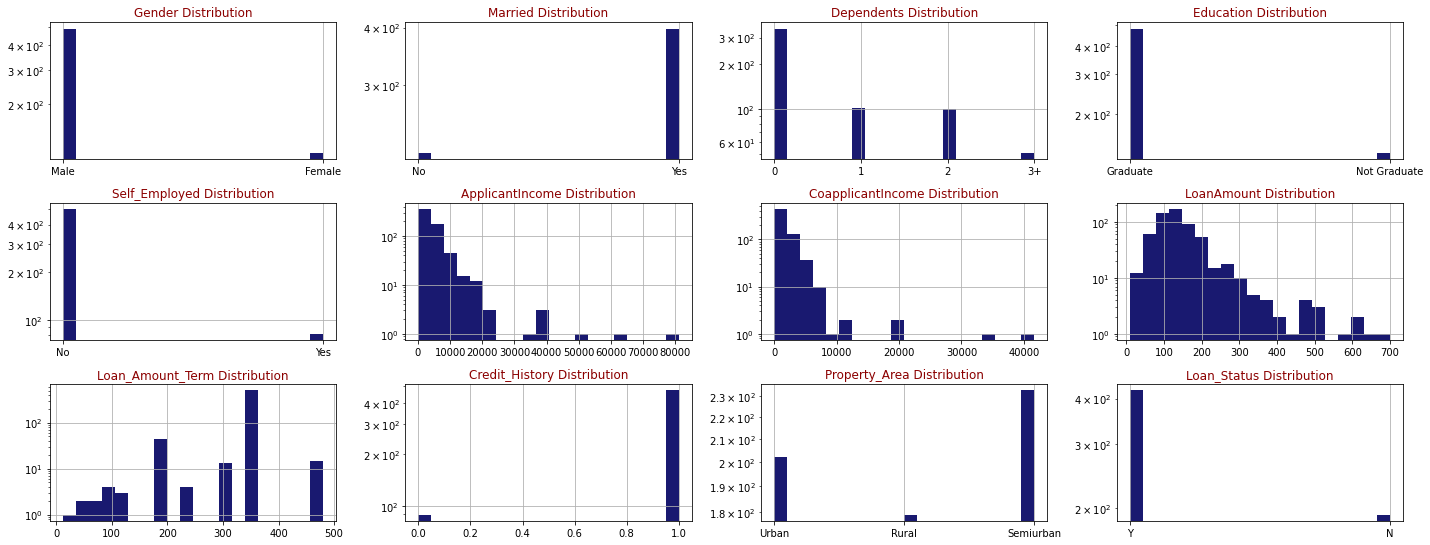

In [11]:
# Plot histogram of each parameter
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20,20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins = 20, ax = ax, facecolor = 'midnightblue')
        ax.set_title(feature+" Distribution", color = 'DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(df,df.columns,8,4)

In [13]:
df.shape

(614, 12)

In [14]:
X = df.iloc[:,:11]
Y = df['Loan_Status']

In [15]:
X = pd.get_dummies(X)

In [16]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [17]:
# applying iterative imputer to impute the missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr, missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
X = imp.fit_transform(X)

[IterativeImputer] Completing matrix with shape (614, 20)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.04
[IterativeImputer] Change: 119.11585722661201, scaled tolerance: 81.0 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.07
[IterativeImputer] Change: 0.3488117409532947, scaled tolerance: 81.0 
[IterativeImputer] Early stopping criterion reached.


In [18]:
Y = pd.DataFrame(Y)
Y.replace({'Loan_Status':{'N': 0, 'Y': 1}}, inplace = True)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify= Y)